# РЕГРЕСІЙНІ МОДЕЛІ
** Мета роботи: **
Ознайомитись з різновидами регресійних моделей.

Завдання:
Завантажити дані про якість червоного вина

Дослідити дані, підготувати їх для побудови регресійної моделі

Розділити дані на навчальну та тестову вибірки

Побудувати декілька регресійних моделей для прогнозу якості вина (12 - quality). Використати лінійну одномірну та багатомірну регресію та поліноміальну регресію обраного вами виду (3-5 моделей)

Використовуючи тестову вибірку, з'ясувати яка з моделей краща

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [58]:
df = pd.read_csv('./data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
# Check for undefined values
df.isna().any()


fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [60]:
# check for negative values
df.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [61]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<Axes: title={'center': 'Correlation between columns'}>

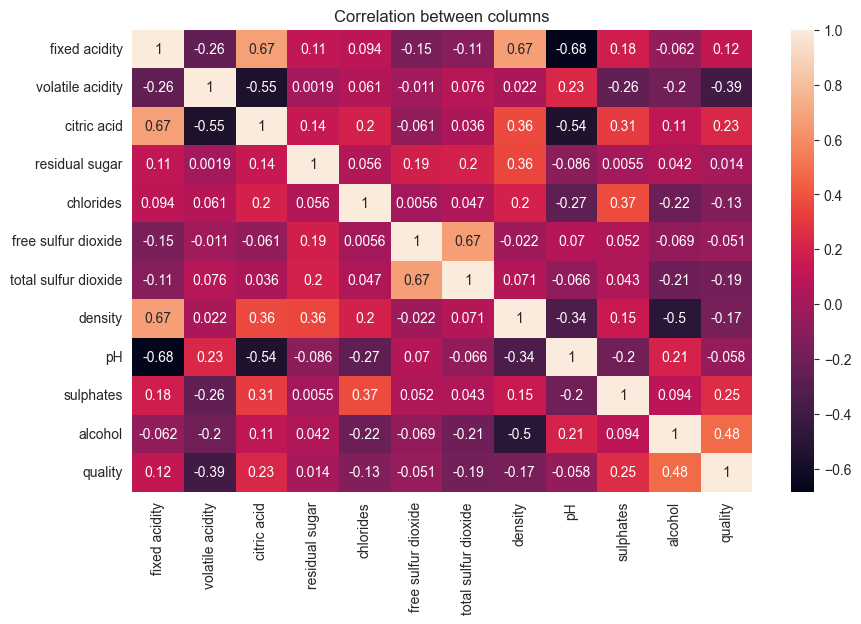

In [62]:
fig, axis = plt.subplots(figsize=(10, 6))
axis.set_title('Correlation between columns')
sn.heatmap(df.corr(), ax=axis, annot=True)

In [63]:
# alcohol has the highest correlation with quality (0.48)

# linear regression
X = df.alcohol.values.reshape(-1, 1)
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

print('R^2 score:', reg.score(X_test, y_test))

R^2 score: 0.18535810854277013


In [64]:
# polynomial regression
X = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred = reg.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


R2 score: -0.21770378433443072


In [65]:
# Multivariate Regression

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

score = reg.score(X_test, y_test)
print('R^2 score:', score)

R^2 score: 0.3513885332505242


## Висновок

В даній лабораторній роботі ми ознайомились з різновидами регресійних моделей та побудували декілька регресійних моделей для прогнозу якості вина. Використовуючи R^2 score, ми з'ясували, що найкращою моделлю є поліноміальна  регресія.